![pipeline](https://static.designandreuse.com/img20/20230306c_1.jpg)
____

<font size=100 color=#11FF99> Machine Learning Workflow: Data Science </font>

<font size=5 color=#009988> ICA 2 </font>

____


Before you get started, take the time to introduce yourself to your group members. We are randomizing the groups so that you get to know everyone and we build a vibrant ML community. Start with:
* name,
* background,
* ML interests,
* future plans.

_____

This assignment is **group submission** (only one submission per group). Include the full name of the group members.

## Name: Bingqing Wang, Josiah Hill, Angqi Li, Kang Ho Lee


The basic goal for today is to begin thinking about machine learning (ML) projects. We will mainly use Chapter 2 in your textbook for the next week, but today we will start thinking about ML projects in terms of their workflow. 

The ML workflow can contain many steps and today we will focus on the initial steps that constitute what we will refer to as "data science" (DS). Look at the diagram at the top of this notebook: for today, we are concerned with the first three steps.

_____

###  <font color=#FFBB00> Get Some Data</font>
_____

The code below retreives a dataset from the internet. Look through the code and discuss it with your group briefly. This is given here for your convenience and you don't need to know too much about it at this point - it gets the data you need for today. 

This is the data for Chapter 2, so we will also use it next week. (This code is on the author's Github.)

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

Confirm that the code above runs and you can find the data on your computer. There should be a folder called `datasets` and the dataset should be in there. 

Once the dataset is in on your computer in the correct folder, we can now read it in and examine it. Here, the data from a CSV file is read in and stored in a Pandas dataframe.

In [2]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

Do not continue if this is not working (e.g., you are getting errors). Nothing below will work if you didn't load the dataset. 

_____

###  <font color=#FFBB00> Initial Data Analysis (IDA)</font>
_____

IDA is the next step in the data science workflow. In IDA we quickly examine the data to see its basic structure and search for any obvious problems. Because the data is in a dataframe, we can use the many methods within Pandas.

In [4]:
housing.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Discuss this dataset with your group members. Vary the number of lines displayed. In a markdown cell, discuss what you see and what it means to you. 

# Answer
The dataset shows the information of the house price, positions, the population, income and other related info. The data are numbers except the ocean_proximity.

Next, try these methods:
* `.info()`
* `.describe()`
* `.value_counts()`

For each of these, again discuss with your group and summarize your insights in a markdown cell. Check the count in `describe()` to see if each column has the same number of entries.

# Answer

Using .info() and .describe() we could get if there is missing data in the whole dataset. And we could know the data type of each attribute from .info() and statistic data from .describe(). Using .value_counts() we could get the counts of each value for different attributes.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

_____

###  <font color=#FFBB00> Missing Data</font>
_____

It is _extremely_ important that you examine your data to see if there are missing values. Although it depends on the source of the data and how it is stored, missing values often appear as a `NaN`. There are two reasons why you need to do this. 

First, while some libraries might allow you to input data with missing values, you don't always know what the library does with them. In same cases, you can get strange and incorrect results, or perhaps confusing error messages, only to find learn after hours of debugging it is because there are `NaN`s in the data. 

Second, missing values in your data could be a signal that there is <font color=#FF00FF>bias</font> in your data. You need to stop and understand _why_ the data is missing and repair it. This is generally a very difficult task, although sometimes you might get lucky. We won't go into a deep study of [missingness](https://en.wikipedia.org/wiki/Missing_data) in this class, but be aware of the issue. (If you have had a data science course you have seen missingness.)

Have a discussion with members of your group about missingness. How many of them are aware of the different types? Write a short summary in a markdown cell.

Look back at the dataset and what the various Pandas methods revealed to you. What is your thinking on missing data for this dataset? How do you know? Give a discussion in a markdown cell.

Compare those conclusions with this method, for different columns:
* `isna()`
* `isna().sum()`

# Answer

Missing completely at random: the missingness of data is unrelated to any study variable. Therefore, the missing data could be dropped without producing the bias.

Missing at random: occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information. 

Missing not at random: value of the variable that's missing is related to the reason it's missing. We need to find the connection between them to produce the missing data to avoid bias.

In [11]:
housing.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [12]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Answer
.isna() only gives the mask of the data("True: for NAN value, "False" for real values). 

.isna().sum() gives the counts of the missing data for every attribute. We could see there are 207 missing values in "total_bedrooms".

_____

###  <font color=#FFBB00> Imputing Data</font>
_____

When we find there are missing values in our dataset, what should we do? As mentioned above, it can be a quite complicated task. 

If we assume the best situation for our dataset, there is a simple solution. We'll assume we are in this situation, which is that the missing values are missing completely at random - they don't signal any bias. And, there are so few missing values we can simply ignore them. Repairing the missing values is referred to as "[imputation](https://en.wikipedia.org/wiki/Imputation_(statistics))". What do you think the absolute simplest approach is? _Just delete all rows with missing values!_ 

This is so commonly done that Python's Pandas library has the `dropna()` command to do just this. 

In the ICA for next week, we will begin with a thorough cleaning of the data.

_____

###  <font color=#FFBB00> Sci-kit Learn Preprocessing Libraries</font>
_____

Throughout this course you will get very comfortable with `sklearn` libraries. One general class of libraries are preprocessing libraries. 

Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to see one such example. We will use this in next week's ICA. This library provides a bit more power than `dropna()`.

_____

###  <font color=#FFBB00> Exploratory Data Analysis (EDA)</font>
_____

Next, we will turn from IDA to EDA and explore our data in more detail. 

Discuss the following plot with your group members and write a summary of what you see in a markdown cell. 

Some ideas for what to look for:
* what exactly is being displayed? 
* are all of the columns in the dataframe shown? why? or why not? 
* do the values you see make sense?
* what are the units?
* are there obvious problems with any of the distributions? 

# Answer

1. The histogram for each numerical variable is displayed. 

2. No. The 'ocean_proximity' variable is not shown because it's categorical data.

3. The values of "median_income" makes no sense. the unit should be "thousand" or "handred

4. The units of "median_income" should be "handred thousand" dollars. 

5. The distributions of the "Housing_median_age" and 'median_house_value' have the up limit.

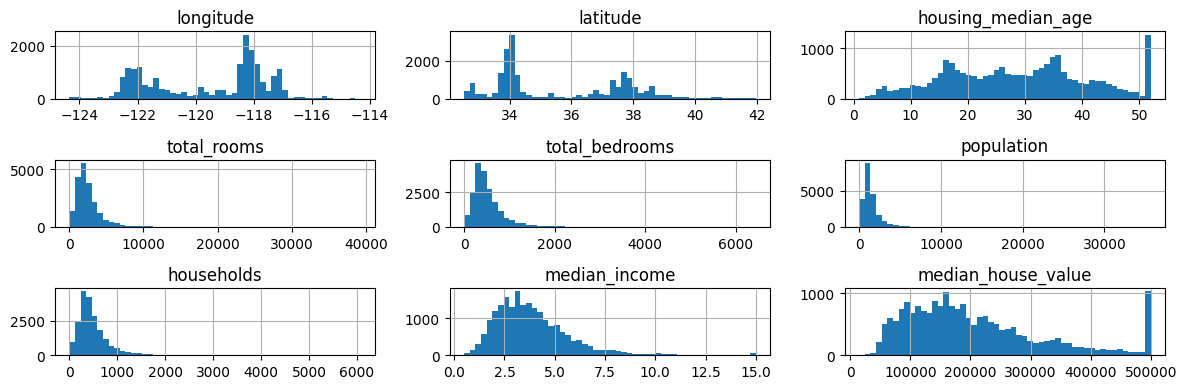

In [4]:
housing.hist(bins=52, figsize=(12,4))
plt.tight_layout()

List the problems and issues you have found with this dataset so far.

Given what you know about the data, what are some interesting visualizations you can use for EDA? 

Since the application here is to geographical data, exploring spatial relations is a good place to start. Let's see what a scatter plot looks like.

<Axes: xlabel='longitude', ylabel='latitude'>

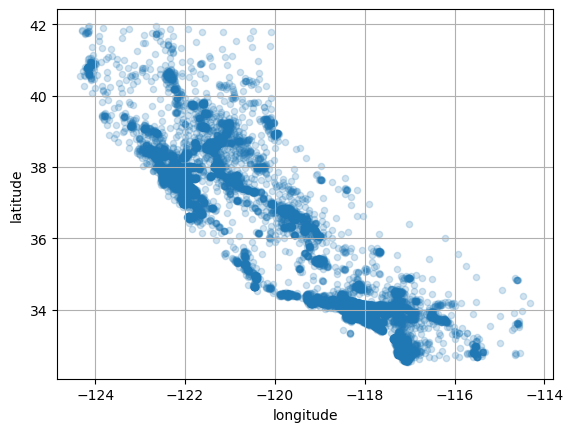

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

Using as much information as you can from the dataframe make many variants of this visualization for EDA purposes. 

Note that we are working with a Pandas dataframe and using its [plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) tools. We could also use other visualization libraries, such as `Seaborn`, `Plotly` or `matplotlib` -- we'll save those options for later.

Be sure try use _at least_ these options:
* _s_ : size
* _c_ : color
* cmap
* legend
* colorbar

Use all of these, and more, in various combinations. Design a final EDA plot that expresses maximally what you see in this dataset.

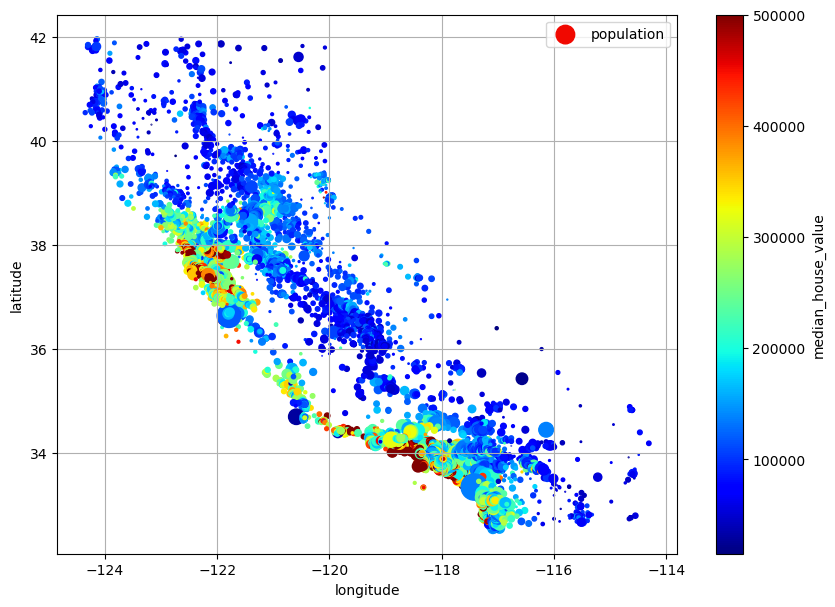

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False,
             figsize=(10, 7))
plt.show()

_____

###  <font color=#FFBB00> Correlations </font>
_____

What have we done so far in our IDA-EDA process?
1. examined the data directly
2. used libraries to look at statistical properties
3. we also searched for missing data
4. we visualized the data in several ways to become familiar with it, and its weaknesses

Next, we want to get more quantitative by exploring correlations. 

Examine correlations using `.corr()` and visualize them using `scatter_matrix`. Both are from Pandas. 

In [25]:
corr_matrix= housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


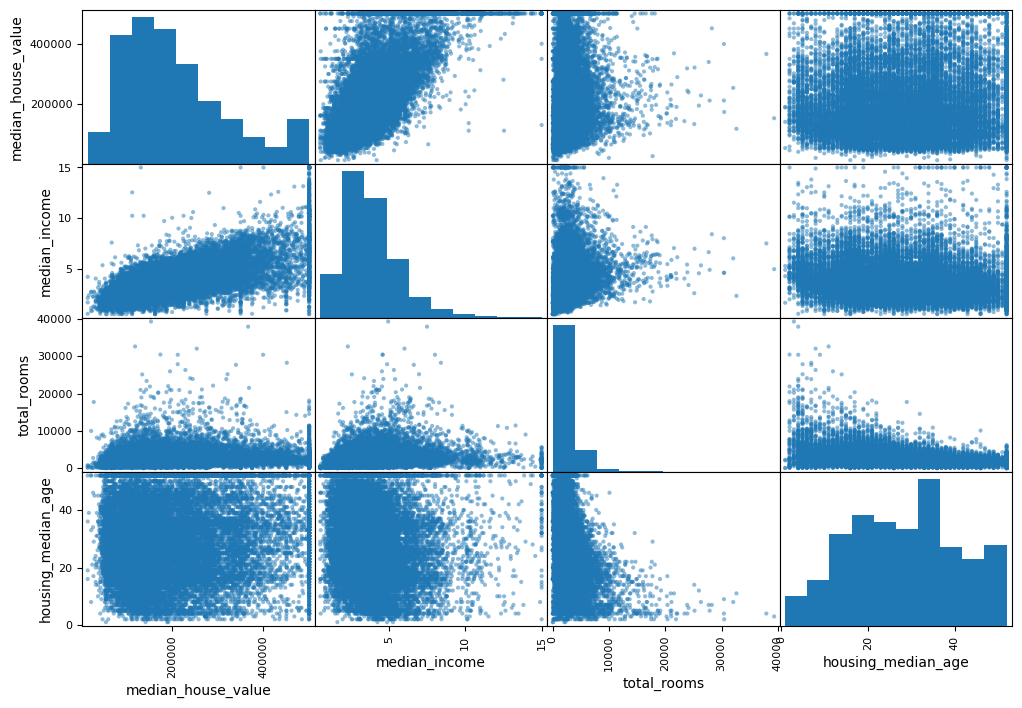

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

_____

###  <font color=#FFBB00> Pairplot </font>
_____

Aside from `.corr()` and `scatter_matrix` in pandas, there are other libraries that could help with exploration of the data. Here we want to use another visualization library called Seaborn. You might want to use this library for your project. For now, we want to focus on `pairplot` and its parameters.


Examine correlation using `pairplot` and its various options such as `kind`,`hue`, and so on.

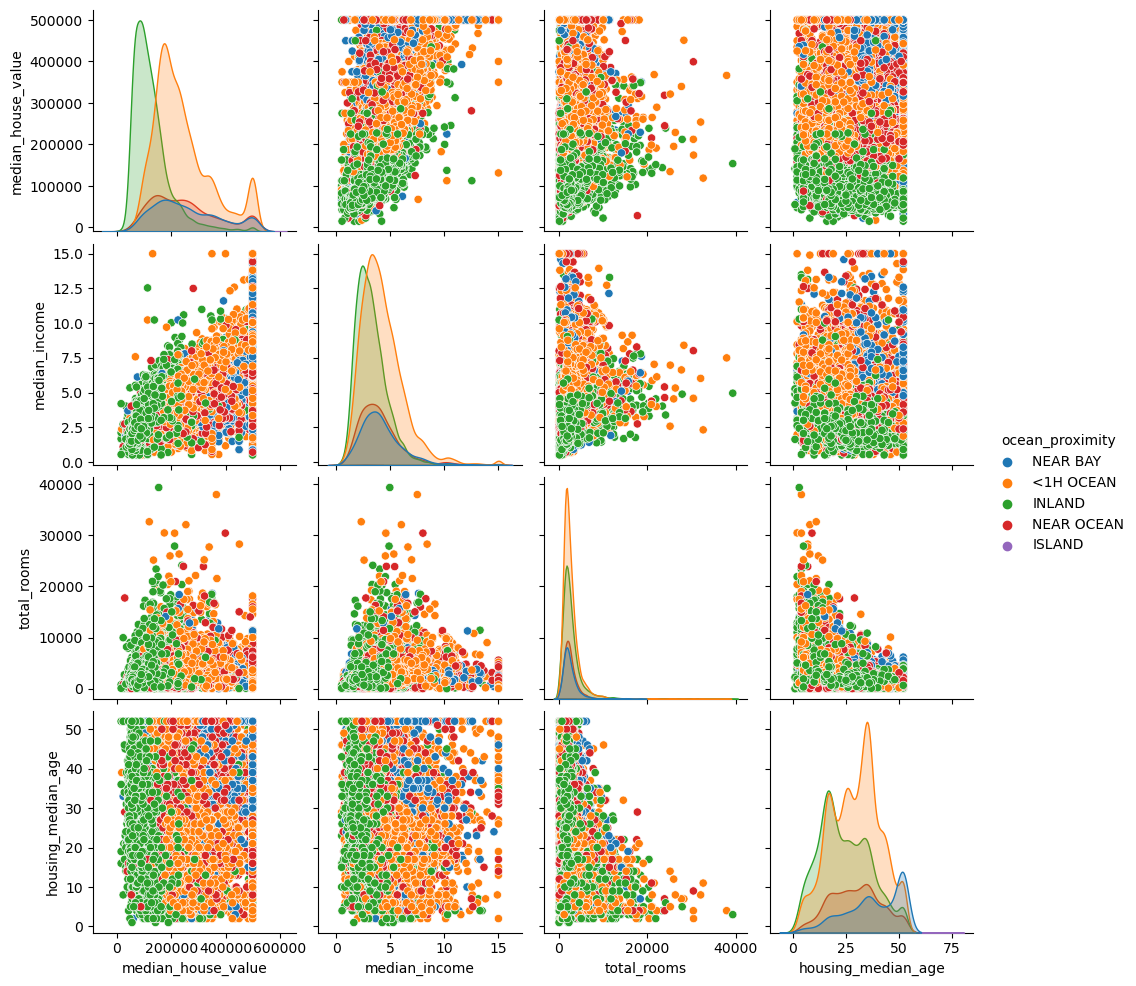

In [31]:
import seaborn as sns

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age","ocean_proximity"]
sns.pairplot(housing[attributes], hue="ocean_proximity", kind = 'scatter')

_____

###  <font color=#FFBB00> Read Chapter 2</font>
_____

Before next week, read Chapter 2 carefully. Pay attention to the ideas mainly at a high level: how would you organize an ML project? Later in the semester you are going to wonder: what needs to me in my capstone project for this course? The simplest answer is something of the size and scale of chapter, including all of the steps. 

As your project ideas evolve through the semester we may need to adpat new rules for your project. For example, reinforcement learning projects tend to have a very different flavor. But, in any case, Chapter 2 gives you an idea for the spirit of a project: _end-to-end_. 